In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1.Read the dataset banks.csv??
df= pd.read_csv('Bank_data.csv')
df.head()


,Financial Institution Number,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss
0,NaN,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",4/19/1934,FDIC,NaN,PAYOUT,1064,1435.0,NaN
1,NaN,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",5/28/1934,FDIC,NaN,PAYOUT,238,374.0,NaN
2,NaN,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",7/18/1934,FDIC,NaN,PAYOUT,42,91.0,NaN
3,NaN,FLORENCE DEPOSIT BANK,COMMERCIAL BANK,STATE,"FLORENCE, IN",7/18/1934,FDIC,NaN,PAYOUT,69,105.0,NaN
4,NaN,BANK OF LEWISPORT,COMMERCIAL BANK,STATE,"LEWISPORT, KY",08-06-34,FDIC,NaN,PAYOUT,68,81.0,NaN


In [3]:
df.shape


(3484, 12)

In [4]:
#2-Remove/ Handle null values(if any). Drop (few) columns if unnecessary????
df.isnull().sum()

Financial Institution Number    601
Institution Name                  0
Institution Type                  0
Charter Type                      0
Headquarters                      0
Failure Date                      0
Insurance Fund                    0
Certificate Number              485
Transaction Type                  0
Total Deposits                    0
Total Assets                    151
Estimated Loss                  975
dtype: int64

In [9]:
df.shape
d1=df
df2=d1.drop(['Certificate Number','Financial Institution Number'],axis=1)
df2.head()
df2.dropna(inplace=True)
df2.shape

(2509, 10)

COMMERCIAL BANK        1619
SAVINGS ASSOCIATION     572
SAVINGS BANK            318
Name: Institution Type, dtype: int64


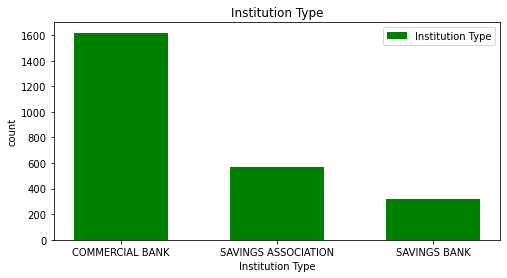

In [11]:
#3-Depict count of 'Institution Type' on a bar chart and a countplot????
d3=(df2['Institution Type'].value_counts())
print(d3)
plt.figure(figsize=(8,4))
plt.bar(d3.index,d3.values,label="Institution Type",color='g',width=.6)
plt.legend()
plt.title('Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('count')
plt.show()

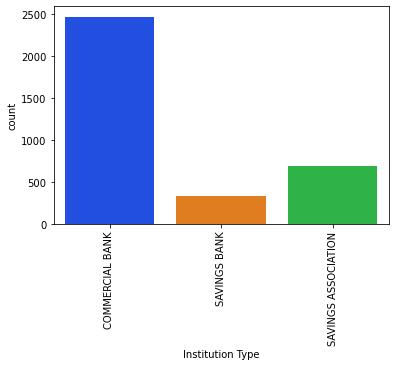

In [12]:
sns.countplot('Institution Type',data=df,palette='bright')
plt.xticks(rotation=90)
plt.show() 

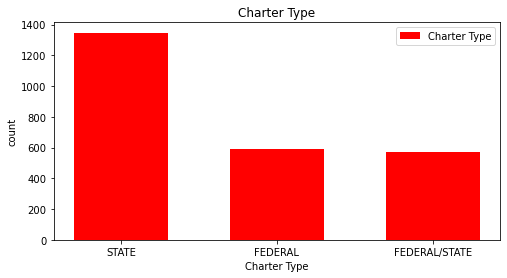

In [13]:
#4-Depict count of 'Charter Type' on a bar chart and a countplot???
d4=(df2['Charter Type'].value_counts())
d4
plt.figure(figsize=(8,4))
plt.bar(d4.index,d4.values,label="Charter Type",color='r',width=.6)
plt.legend()
plt.title('Charter Type')
plt.xlabel('Charter Type')
plt.ylabel('count')
plt.show()

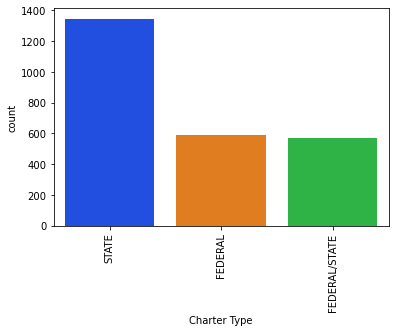

In [14]:
sns.countplot('Charter Type',data=df2,palette='bright')
plt.xticks(rotation=90)
plt.show() 

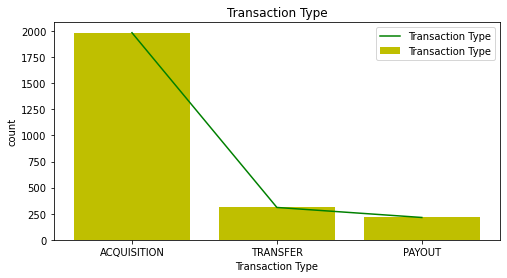

In [15]:
#5--depict count of 'Transaction Type' on a line chart superimposed on a bar chart and a countplot???
d11=(df2['Transaction Type'].value_counts())
d11
plt.figure(figsize=(8,4))
plt.plot(d11.index,d11.values,label="Transaction Type",color='g')
plt.bar(d11.index,d11.values,label="Transaction Type",color='y')
plt.legend()
plt.title('Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('count')
plt.show()

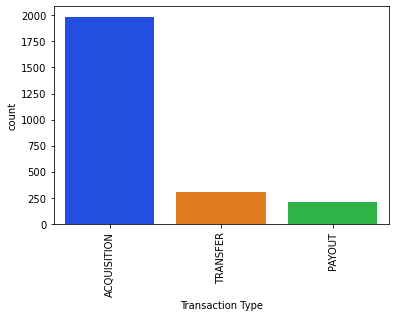

In [16]:
sns.countplot('Transaction Type',data=df2,palette='bright')
plt.xticks(rotation=90)
plt.show() 

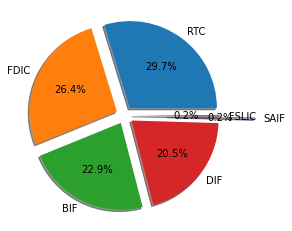

In [17]:
#6--Depict count of 'Insurance Fund' on pie chart???
d1=(df2['Insurance Fund'].value_counts())
d1
plt.pie(d1.values,labels=d1.index,autopct="%.1f%%",shadow=True,explode=(0.1,0.1,0.1,0.1,0.5,0.1))
plt.show()

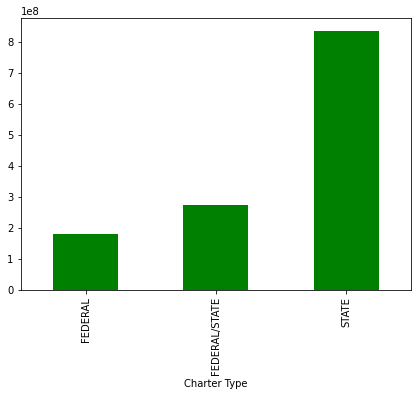

In [18]:
#7--Depict sum of Total Assets based on Charter Type on a bar chart????
d2=df2.groupby(['Charter Type'])['Total Assets'].sum()
d2
d2.plot(kind='bar',color='g',figsize=(7,5))
plt.show()

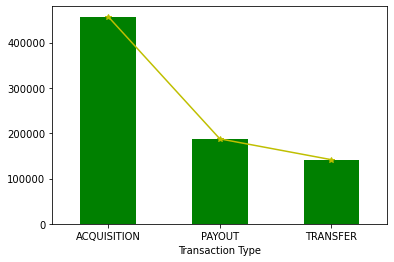

In [19]:
#8--Depict mean of Total Deposits based on Transaction Type on a bar chart superimposed on a line chart????
d2=df2.groupby(['Transaction Type'])['Total Deposits'].mean()
d2
d2.plot(kind='bar',color='g')
d2.plot(kind='line',marker='*',color='y')
plt.show()

<ipython-input-20-7a5aee59e2e0>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d2=df2.groupby(['Charter Type'])['Total Deposits','Total Assets'].mean()


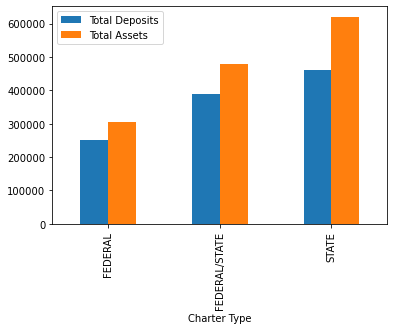

In [20]:
#9--Depict mean of Total Deposit and Total Assets based on Charter Type on a bar chart, stacked bar chart and a line chart????
d1=(df2[['Total Deposits','Total Assets','Charter Type']])
d1
d2=df2.groupby(['Charter Type'])['Total Deposits','Total Assets'].mean()  
d2
d2.plot(kind='bar')
plt.show()

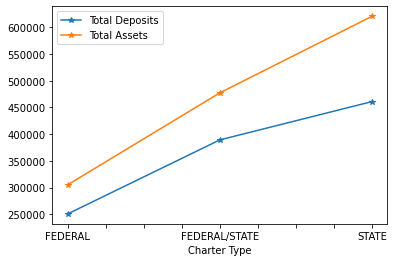

In [21]:
d2.plot(kind='line',marker='*')
plt.show()

In [22]:
d3=d2.unstack()
d3

                Charter Type 
Total Deposits  FEDERAL          250642.149153
                FEDERAL/STATE    389256.489510
                STATE            460963.472160
Total Assets    FEDERAL          305106.322034
                FEDERAL/STATE    477309.830420
                STATE            620748.642168
dtype: float64

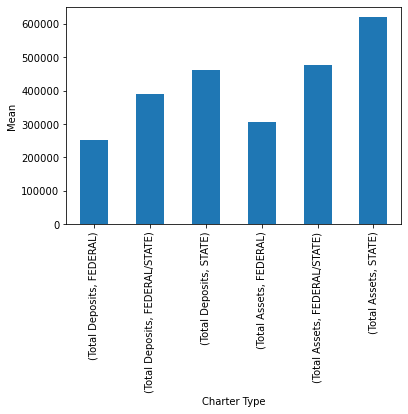

In [23]:
d3.plot(kind='bar',stacked=True)
plt.xlabel('Charter Type' )
plt.ylabel('Mean')
plt.xticks(rotation=90)
plt.show()

In [24]:
#10--Derive the columns - Fail_Year, Fail_Month, Fail_Day based on Failure date field???
d1=df2[['Failure Date']]
d1
df2.dtypes

Institution Name     object
Institution Type     object
Charter Type         object
Headquarters         object
Failure Date         object
Insurance Fund       object
Transaction Type     object
Total Deposits        int64
Total Assets        float64
Estimated Loss      float64
dtype: object

In [25]:
df2['Failure Date']= pd.to_datetime(df2['Failure Date'])

In [26]:
df2.dtypes

Institution Name            object
Institution Type            object
Charter Type                object
Headquarters                object
Failure Date        datetime64[ns]
Insurance Fund              object
Transaction Type            object
Total Deposits               int64
Total Assets               float64
Estimated Loss             float64
dtype: object

In [27]:
df2['Fail Year']=df2['Failure Date'].dt.year
df2['Fail Month']=df2['Failure Date'].dt.month
df2['Fail Day']=df2['Failure Date'].dt.day
df2['Quarter']=df2['Failure Date'].dt.quarter

df2.shape

(2509, 14)

In [28]:
df2['Fail Year'].unique()

array([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [30]:
#11-Depict Fail_Month wise mean of Total Deposits and Total Assets on a bar chart, line chart and a scatter chart???
d2=df2.groupby(['Fail Month'])['Total Deposits','Total Assets'].mean()
d2

<ipython-input-30-16f987621de5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d2=df2.groupby(['Fail Month'])['Total Deposits','Total Assets'].mean()


,Total Deposits,Total Assets
Fail Month,,
1,4.782600e+05,5.644184e+05
2,4.165550e+05,5.198180e+05
3,2.348706e+05,2.795132e+05
4,2.837976e+05,3.343707e+05
5,2.628159e+05,3.385309e+05
6,2.037288e+05,2.393804e+05
7,3.421471e+05,4.581422e+05
8,3.818674e+05,4.553171e+05
9,1.524821e+06,2.345075e+06


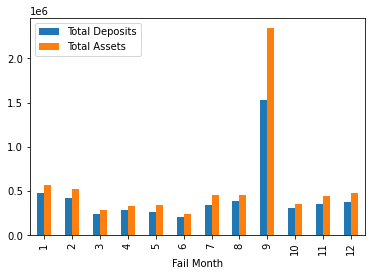

In [30]:
d2.plot(kind='bar')
plt.show()

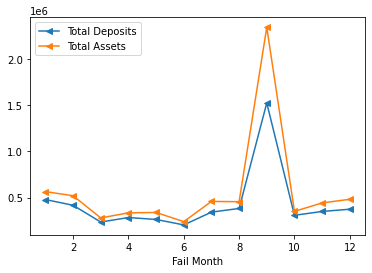

In [31]:
d2.plot(kind='line',marker='<')
plt.show()

In [32]:
# d2.plot(kind="scatter",marker="*",color='blue')

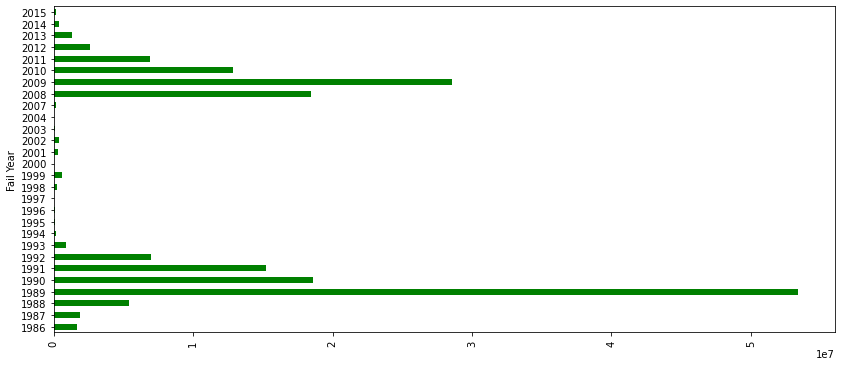

In [32]:
#12-Depict Fail_Year wise sum of Estimated Loss on a horizontal bar chart???
d2=df2.groupby(['Fail Year'])['Estimated Loss'].sum()
d2

d2.plot(kind='barh',color='g',figsize=(14,6))
plt.xticks(rotation=90)
plt.show()

In [33]:
#13--Derive a column - Fail_Quarter based on Failure Date
#df['Quarter']=df['Failure Date'].dt.quarter
#df[['Quarter']]

In [34]:
#Find Fail_Quarter wise mean of Total Assets where Transaction type is 'PAYOUT'.
#Depict the result on a bar and a line chart superimposed????

In [35]:
d1=df2[['Quarter','Total Assets','Transaction Type']]
d1
d2=d1[(d1['Transaction Type']=='PAYOUT')]
d2
d3=d2.groupby(['Quarter'])['Total Assets'].mean()
d3

Quarter
1    229285.329114
2    265712.234043
3    119636.702128
4    148118.829268
Name: Total Assets, dtype: float64

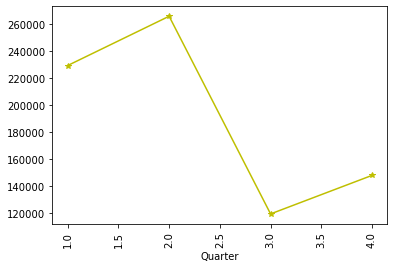

In [39]:
#d3.plot(kind='bar',color='g')
d3.plot(kind='line',marker='*',color='y')
plt.xticks(rotation=90)
plt.show()

15.Find max of Total Assets and Total Deposits based on Fail Month where Charter Type is State and
Institution Type is Commercial Bank.Depict the result on a bar chart, stacked bar chart and line chart separately

In [42]:
d1=df2[['Total Assets','Total Deposits','Fail Month','Charter Type','Institution Type']]
d1
d2=d1[(d1['Charter Type']=='STATE') & (d1['Institution Type']=='COMMERCIAL BANK')]
d2.head()
d3=d2.groupby(['Total Assets'])['Fail Month'].max()
print(d3)
d4=d2.groupby(['Total Deposits'])['Fail Month'].max()
print(d4)

Total Assets
1731.0         2
2679.0        12
2781.0         3
2899.0        10
3075.0        11
              ..
3172915.0      5
3250734.0      4
4046888.0     12
10895336.0    11
25455112.0     8
Name: Fail Month, Length: 1026, dtype: int64
Total Deposits
0            7
1706         2
2623        12
2663         3
2867        10
            ..
2420738      5
2822300     12
2846886      4
7653666     11
20072099     8
Name: Fail Month, Length: 1027, dtype: int64


In [64]:
# plt.bar(d3.values,d4.values,label="failure month", color='g',width=.3,)
# plt.legend(loc=1)
# plt.xticks(rotation=90)
# plt.show()

#### 17--Find mean of Total Assets and mean of Estimated Loss based on Quarter and Insurance Fund where Total Deposits is over<br> 50000 and Institution Type is Savings Bank. Depict the result on a bar chart and stacked bar chart (unstacking is not required) separately???

In [43]:
d1=df2[['Total Assets','Estimated Loss','Quarter','Insurance Fund','Total Deposits','Institution Type']]
d1
d2=d1[(d1['Total Deposits']>50000) & (d1['Institution Type']=='SAVINGS BANK')]
d2
d3=d2.groupby(d2['Total Assets'])['Quarter','Insurance Fund'].min()
da=d3.head(241)
print(da)
d4=d2.groupby(d2['Estimated Loss'])['Quarter','Insurance Fund'].min()
print(d4)


<ipython-input-43-a8b6865f981b>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d3=d2.groupby(d2['Total Assets'])['Quarter','Insurance Fund'].min()
<ipython-input-43-a8b6865f981b>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d4=d2.groupby(d2['Estimated Loss'])['Quarter','Insurance Fund'].min()


              Quarter Insurance Fund
Total Assets                        
43367.0             2            RTC
50912.0             4            RTC
53786.0             4            RTC
58634.0             2            RTC
58810.0             4            RTC
...               ...            ...
7431636.0           1            BIF
8173572.0           1            RTC
9523603.0           3            RTC
9813776.0           4            RTC
9890866.0           2            BIF

[241 rows x 2 columns]
                Quarter Insurance Fund
Estimated Loss                        
-4386.0               2            RTC
 0.0                  2            BIF
 3.0                  2            RTC
 372.0                1            RTC
 1195.0               3           SAIF
...                 ...            ...
 1243168.0            1            RTC
 1565479.0            4            RTC
 2258440.0            4            DIF
 5274515.0            2            DIF
 12438005.0           3    

#### 18--Find min of Total Deposits and max of Estimated Loss based on Charter Type and Fail Year where Fail_Year> 2010 and Institution Name is not First State Bank. Depict the result on a stacked bar chart(unstacking is not required)

<ipython-input-90-cadfda2b8476>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d3=d2.groupby(d2['Total Deposits'])['Charter Type','Fail Year'].min()
<ipython-input-90-cadfda2b8476>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d4=d2.groupby(d2['Estimated Loss'])['Charter Type','Fail Year'].max()


                 Charter Type  Fail Year
Total Deposits                          
3705                  FEDERAL       2015
17548           FEDERAL/STATE       2012
18221                   STATE       2014
19579                   STATE       2013
20855                   STATE       2014
...                       ...        ...
1535194         FEDERAL/STATE       2011
1693592               FEDERAL       2011
1847851                 STATE       2011
2338335               FEDERAL       2013
2736201         FEDERAL/STATE       2011

[191 rows x 2 columns]
                 Charter Type  Fail Year
Estimated Loss                          
384.0                   STATE       2012
1396.0                  STATE       2012
1614.0                FEDERAL       2015
2316.0                FEDERAL       2014
3869.0          FEDERAL/STATE       2014
...                       ...        ...
272663.0                STATE       2011
279845.0                STATE       2011
323395.0        FEDERAL/STATE    

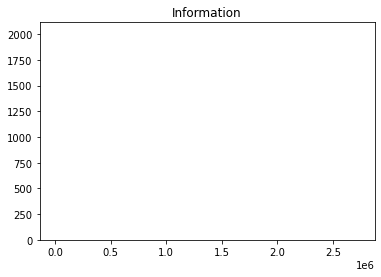

In [90]:
d1=df2[['Total Deposits','Estimated Loss','Charter Type','Fail Year','Institution Name']]
d1
d2=d1[(d1['Fail Year']>2010) & (d1['Institution Name']!='FIRST STATE BANK')]
d2
d3=d2.groupby(d2['Total Deposits'])['Charter Type','Fail Year'].min()
print(d3)
d4=d2.groupby(d2['Estimated Loss'])['Charter Type','Fail Year'].max()
print(d4)
plt.bar(d3.index,d3['Fail Year'],width=.5,color='tan')
plt.bar(d4.index,d4['Fail Year'],color='maroon',width=.8)
plt.title('Information')

plt.show()

In [44]:
#19--Between the dates 1st Jan 2010 and 31st Dec 2015, find the mean of Total Deposits and Total Assets based on Charter Type
#and InstitutionType.Depict the result on a stacked bar chart(unstacking is not required)????
# d1=df2[['Failure Date','Total Deposits','Total Assets','Charter Type','Charter Type']]
# d1
# d2=d1[(d1['Failure Date']>=2010-01-01) & (d1['Failure Date']<=2015-12-31)]
# d2.head()


In [45]:
df2.head(2)

,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Transaction Type,Total Deposits,Total Assets,Estimated Loss,Fail Year,Fail Month,Fail Day,Quarter
877,FIRST STATE BANK,COMMERCIAL BANK,STATE,"CACHE, OK",1986-01-09,FDIC,ACQUISITION,18897,20725.0,4108.0,1986,1,9,1
878,THE FIRST NATIONAL BANK OF WHITE CITY,COMMERCIAL BANK,FEDERAL,"WHITE CITY, KS",1986-01-09,FDIC,ACQUISITION,9239,9607.0,3408.0,1986,1,9,1


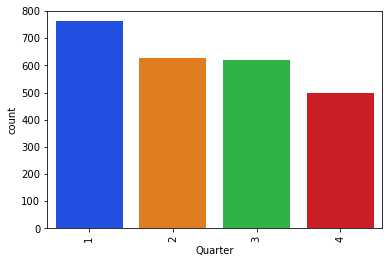

In [47]:
#20--Depict Charter Type based on Fail Quarter on a countplot???
d1=df2[['Quarter','Charter Type']]
d1
d1['Quarter'].max()
sns.countplot('Quarter',data=d1,palette='bright')
plt.xticks(rotation=90)
plt.show() 

      Total Assets  Total Deposits  Fail Year     Institution Type
3379       19259.0           17548       2012  SAVINGS ASSOCIATION
3384      182561.0          171365       2012  SAVINGS ASSOCIATION
3387      434111.0          432223       2012  SAVINGS ASSOCIATION
3393       48861.0           47786       2012  SAVINGS ASSOCIATION
3395      433512.0          415943       2012  SAVINGS ASSOCIATION


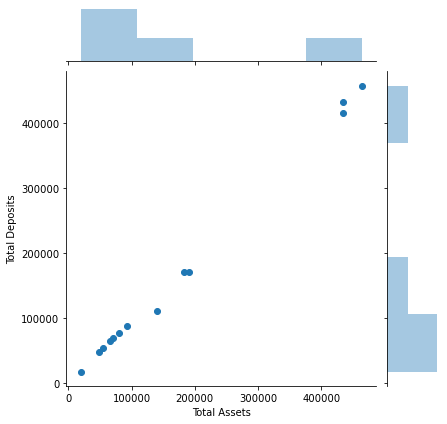

In [49]:
#21--Depict Total Assets vs Total Deposits on a joint plot with scatter kind where Fail Year>=2012 and 
#Institution Type is Savings Association?????
d1=df2[['Total Assets','Total Deposits','Fail Year','Institution Type']]
d1
d2=d1[(d1['Fail Year']>=2012) & (d1['Institution Type']=='SAVINGS ASSOCIATION')]
print(d2.head())
sns.jointplot(x='Total Assets',y='Total Deposits',data=d2,kind='scatter')
plt.xticks(rotation=90)
plt.show()